<h1>MIDTERM EXAM</h1>
<hr>
<h1>35 Insight on Chicago Crimes</h1>
<img src="https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1300/v1665543787/acmhg2fqije0icvm2hzr.jpg">

<h3>Import Necessary Libraries</h3>
<hr>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot 
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

<h3>Import the Data</h3>
<hr>

In [2]:
chicago = pd.read_csv('datasets/Chicago_Crimes.csv')
chicago

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h3>Study and Prepare the Data</h3>
<hr>

In [8]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  category      
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  category      
 4   IUCR                  249123 non-null  category      
 5   Primary Type          249123 non-null  category      
 6   Description           249123 non-null  category      
 7   Location Description  248266 non-null  category      
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

In [13]:
# 1. Handle missing values first
chicago['Location Description'] = chicago['Location Description'].astype(str).fillna('unknown_area')
chicago['Latitude'] = chicago['Latitude'].fillna(chicago['Latitude'].mode()[0])
chicago['Longitude'] = chicago['Longitude'].fillna(chicago['Longitude'].mode()[0])
chicago['X Coordinate'] = chicago['X Coordinate'].fillna(chicago['X Coordinate'].mode()[0])
chicago['Y Coordinate'] = chicago['Y Coordinate'].fillna(chicago['Y Coordinate'].mode()[0])
chicago['Community Area'] = chicago['Community Area'].fillna(chicago['Community Area'].mode()[0])
chicago['Location'] = chicago['Location'].fillna(chicago['Location'].mode()[0])

# 2. Fix 'Updated On' before converting to datetime
chicago['Updated On'] = chicago['Updated On'].astype(str).str.replace('/', '-').str.strip()
chicago['Updated On'] = pd.to_datetime(chicago['Updated On'], dayfirst=True, errors='coerce')

# 3. Fix 'Date' before converting to datetime
chicago['Date'] = chicago['Date'].astype(str).str.replace('/', '-').str.strip()
chicago['Date'] = pd.to_datetime(chicago['Date'], dayfirst=True, errors='coerce')

# 4. Extract datetime features
chicago['Year'] = chicago['Date'].dt.year
chicago['Month'] = chicago['Date'].dt.month
chicago['Day'] = chicago['Date'].dt.day
chicago['DayOfWeek'] = chicago['Date'].dt.dayofweek
chicago['Time'] = chicago['Date'].dt.time

# 5. Convert categorical columns AFTER cleaning
categorical_cols = [
    'Case Number', 'Block', 'IUCR', 'Primary Type', 
    'Description', 'Location Description', 'FBI Code', 'Year'
]
chicago[categorical_cols] = chicago[categorical_cols].astype('category')

# 6. Check nulls
chicago.isnull().sum()


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
Time                    0
dtype: int64

<h3>Analyzing the Data</h3>
<hr>

<h1><i>Univariate Data</i></h1>

<h1><strong>Crime Types</strong></h1>
<hr>

<h2>1. What are the top 10 crime types?</h2>

In [ ]:
chicago['Primary Type'].value_counts().head(10)

<h2>2. Which crime type occur the least?</h2>

In [ ]:
chicago['Primary Type'].value_counts().idxmin()

<h2>3. Show the Frequency Distribution of all crime types.</h2>

In [ ]:
chicago['Primary Type'].value_counts().plot(kind = 'bar', figsize = (12,6))

<h1><strong>Arrests & Domestics</strong></h1>
<hr>

<h2>4. How many total arrests happened?</h2>

In [ ]:
chicago['Arrest'].sum()

<h2>5. Percentage of crimes that led to an arrest?</h2>

In [ ]:
chicago['Arrest'].mean() * 100

<h2>6. Total domestic crimes vs. non domestic crimes?</h2>

In [ ]:
chicago['Domestic'].value_counts()

<h1><strong>Time & Year</strong></h1>
<hr>

<h2>7. Trend of no. of crimes per year</h2>

<Axes: xlabel='Year'>

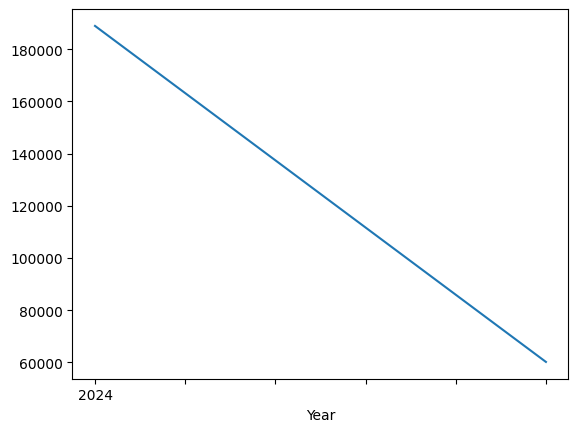

In [15]:
chicago['Year'].value_counts().sort_index().plot(kind='line')

<h2>8. Average number of crimes per year</h2>

In [17]:
chicago['Year'].value_counts().mean()

np.float64(124561.5)

<h1><strong>Locations</strong></h1>
<hr>

<h2>9. Top 5 Location Description of crimes.</h2>

In [18]:
chicago['Location Description'].value_counts().head(5)

Location Description
STREET                66040
APARTMENT             47787
RESIDENCE             29776
SIDEWALK              13265
SMALL RETAIL STORE     9858
Name: count, dtype: int64

<h2>10. Most common block for crimes.</h2>

In [19]:
chicago['Block'].value_counts().idxmax()

'001XX N STATE ST'

<h2>11. Number of wards where crimes occured.</h2>

In [20]:
chicago['Ward'].nunique()

50

<h1><strong>Geography</strong></h1>
<hr>

<h2>12. Average Latitude and Longitude of crimes.</h2>

In [21]:
chicago[['Latitude', 'Longitude']].mean()

Latitude     41.847129
Longitude   -87.668871
dtype: float64

<h2>13. Top 8 Community areas with most crimes.</h2>

In [23]:
chicago['Community Area'].value_counts().head(8)

Community Area
25.0    12817
8.0     11019
28.0    10489
32.0     8975
43.0     8190
24.0     7615
23.0     6936
29.0     6605
Name: count, dtype: int64

<h1><i>Bivariate Data</i></h1>

<h1><strong>Crime Types vs. Arrest</strong></h1>
<hr>

<h2>14. Arrest rate(%) per crime types.</h2>

In [24]:
(chicago.groupby('Primary Type')['Arrest'].mean() * 100).sort_values(ascending = False).head(10)

Primary Type
GAMBLING                             100.000000
CONCEALED CARRY LICENSE VIOLATION     98.795181
LIQUOR LAW VIOLATION                  96.875000
NARCOTICS                             95.835220
PROSTITUTION                          95.121951
PUBLIC INDECENCY                      92.307692
INTERFERENCE WITH PUBLIC OFFICER      89.494163
NON-CRIMINAL                          75.000000
WEAPONS VIOLATION                     64.852038
OBSCENITY                             52.830189
Name: Arrest, dtype: float64

<h2>15. Compare arrest vs. non-arrests in theft crimes.</h2>

In [25]:
chicago[chicago['Primary Type'] == 'THEFT']['Arrest'].value_counts(normalize = True)

Arrest
False    0.923498
True     0.076502
Name: proportion, dtype: float64

<h2>16. Heatmap of crime types vs arrest counts.</h2>

<Axes: xlabel='Arrest', ylabel='Primary Type'>

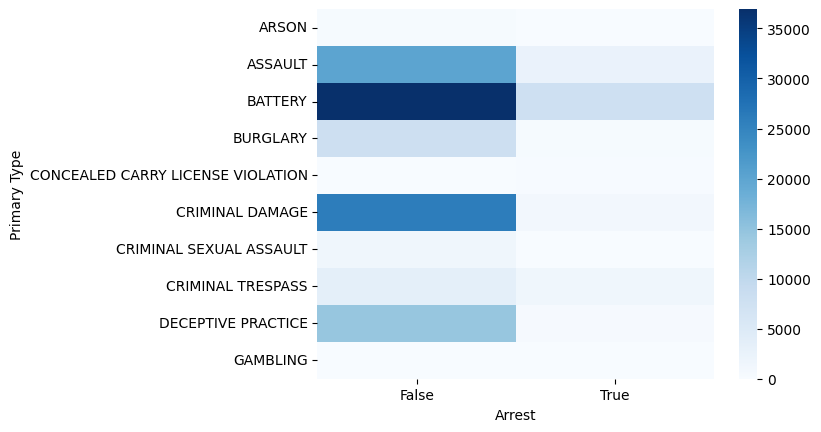

In [29]:
sns.heatmap(chicago.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value = 0).head(10), cmap = 'Blues')

<h1><strong>Year vs. Crime</strong></h1>
<hr>

<h2>17. Top 5 crime types trend by Year.</h2>

In [33]:
chicago[chicago['Primary Type'].isin(chicago['Primary Type'].value_counts().head(5).index)].groupby(['Year', 'Primary Type']).size()

Year  Primary Type                     
2024  ARSON                                    0
      ASSAULT                              17298
      BATTERY                              34052
      BURGLARY                                 0
      CONCEALED CARRY LICENSE VIOLATION        0
                                           ...  
2025  ROBBERY                                  0
      SEX OFFENSE                              0
      STALKING                                 0
      THEFT                                13962
      WEAPONS VIOLATION                        0
Length: 62, dtype: int64

<h2>18. Crimes by year vs District.</h2>

In [35]:
chicago.groupby(['Year', 'District']).size().unstack(fill_value = 0).head(10)

District,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,22,24,25,31
Year,,,,,,,,,,,,,,,,,,,,,
2024,10982,9756,9490,9947,7411,10712,7936,12585,8327,7627,...,6471,6487,5873,9991,10566,4075,5816,6061,9579,10
2025,3427,3092,3055,3371,2472,3445,2584,4106,2583,2506,...,2134,2083,1928,3127,3074,1287,1894,2040,3085,9
